## Problem Statement
Predict the per capita income for the year 2025

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\gjrah\Documents\Data Science\Data_Science\Machine_Learning_Algorithms\Datasets\Linear_Regression\canada_per_capita_income.csv")

In [3]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


### Visualizing the data points

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Capita Income per Year')

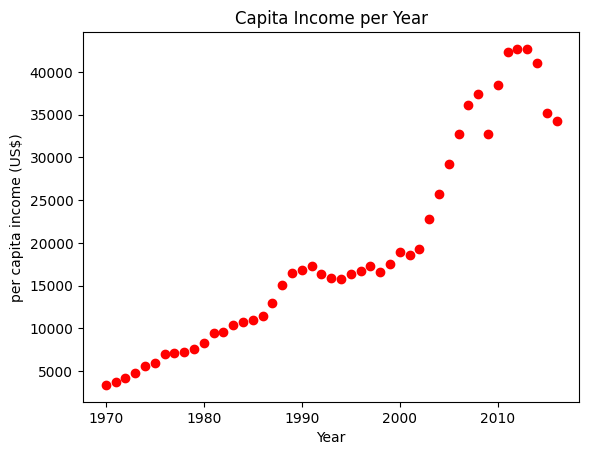

In [6]:
#Visualizing the  data
plt.scatter(df['year'],df['per capita income (US$)'],color="red")
plt.xlabel('Year')
plt.ylabel('per capita income (US$)')
plt.title('Capita Income per Year')

#### Training Linear Regression Model

In [7]:
# Building Linear Regression 
linear_reg_model = LinearRegression()

In [8]:
#Training the Linear Regression model
linear_reg_model.fit(df[['year']],df['per capita income (US$)'],sample_weight=12)

LinearRegression()

#### Predicting 'Captia per Income' for 2025

In [11]:
linear_reg_model.coef_

array([828.46507522])

In [12]:
linear_reg_model.intercept_

-1632210.7578554575

In [15]:
#Manual Calculation
# y = mx + c

y = (linear_reg_model.coef_) * (2025) + linear_reg_model.intercept_
print(f"Predicted Output: {y}")

Predicted Output: [45431.01947053]


In [9]:
# Creating a DataFrame
predict_year = pd.DataFrame({'year':[2025]})

In [10]:
#Predicting the value
linear_reg_model.predict(predict_year)

array([45431.01947053])

#### Visualizing so far

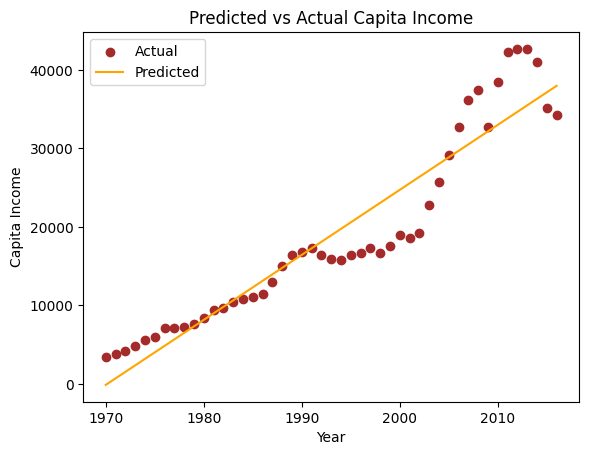

In [16]:
%matplotlib inline
#Plotting the feature and prediction
plt.scatter(df['year'],df['per capita income (US$)'],color='brown',label='Actual')
#Plotting the actual vs predicted value
plt.plot(df['year'], linear_reg_model.predict(df[['year']]), color='orange',label='Predicted')
#X Label
plt.xlabel('Year')
#Y Label
plt.ylabel('Capita Income')
#Title
plt.title('Predicted vs Actual Capita Income')

plt.legend()
plt.show()

### Analysing the predictions

In [17]:
#Calculating the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df['per capita income (US$)'],linear_reg_model.predict(df[['year']]))
print(mae)

3088.866427771443


In [18]:
#Resuidual Analysis
residuals = df['per capita income (US$)'] - linear_reg_model.predict(df[['year']])

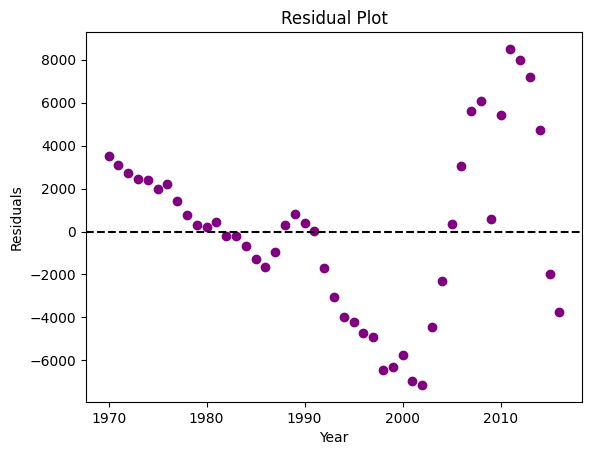

In [19]:
#Plotting the difference / Resudial Analysis
plt.scatter(df.year,residuals,color='purple')
plt.axhline(0, color='black', linestyle="--")
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(df['per capita income (US$)'],linear_reg_model.predict(df[['year']]))
r2 = r2_score(df['per capita income (US$)'],linear_reg_model.predict(df[['year']]))

In [27]:
import math
print(f'Mean Sqaured Error {mse}')
print(f'Root Mean Squared Error {math.sqrt(mse)}')
print(f'R2 Score {r2}')

Mean Sqaured Error 15462739.061504772
Root Mean Squared Error 3932.268945723928
R2 Score 0.890916917957032


### CONCLUSION
#### Observations

#### Non-Linear Pattern:

The residuals show a distinct U-shaped curve, indicating that the relationship between year and per capita income (US$) is not perfectly linear.
The linear regression model struggles to capture the non-linear trend in the data.

#### Better R2 Score:

The R2 Score is 89%, which suggests your model captures the relationship between year and per capita income

#### Systematic Errors:
Residuals are not randomly distributed around the horizontal axis (y=0). Instead, they follow a systematic pattern.
This suggests the linear model is underfitting the data.

#### Change in Trend:
Large residuals in the later years (post-2000) may indicate changes in the trend that the model cannot explain well.
